# Project Title -   NETFLIX MOVIES AND TV SHOWS CLUSTERING

## Project Type - Unsupervised Machine Learning
## Contribution - Individual
## Name - Harshad Humane
## GitHub Link:
https://github.com/harshadhumane18/Netflix-Movies-and-TV-shows-Clustering

# - Problem Statement:
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010.

The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# - Objective:

1. Exploratory Data Analysis
2. Understanding what type content is available in different countries
3. Is Netflix has increasingly focus on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features
5. Recommendations 

### Import Library

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime
import missingno as msno
import re
import string
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
from nltk.corpus import stopwords  #stopwords
from nltk.tokenize import word_tokenize # tokenizing
from nltk.stem import WordNetLemmatizer  # lemmatizer from WordNet
import nltk 
# nltk.download('punkt')
from collections import Counter

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer

#stop-words
# nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# DImensionality Reduction
from wordcloud import WordCloud
from sklearn.decomposition import PCA

# Importing libraries for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the Dataset

In [2]:
data = pd.read_csv('C:\\Users\\harsh\\OneDrive\\Desktop\\My Content\\Data science\\Datasets\\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [3]:
# Copying the dataset
df = data.copy()

### Knowing your dataset

In [4]:
# Dataset first look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Unbais look of dataset
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5429,s5430,Movie,Scary Movie 5,Malcolm D. Lee,"Simon Rex, Ashley Tisdale, Charlie Sheen, Lind...",United States,"August 12, 2020",2013,PG-13,88 min,"Comedies, Horror Movies",Taking aim at not only the horror genre but al...
2349,s2350,Movie,Gangaajal,Prakash Jha,"Ajay Devgn, Gracy Singh, Mohan Agashe, Mohan J...",India,"January 8, 2021",2003,TV-MA,148 min,"Dramas, International Movies","Posted to a small, crime-ridden town, a cop so..."
3538,s3539,TV Show,Last Chance U,NaN,"John Franklin III, DJ Law, Buddy Stephens, Bri...",United States,"July 28, 2020",2020,TV-MA,5 Seasons,Docuseries,In a docuseries set at one of NCAA football's ...
1975,s1976,Movie,Elf Pets: Santa’s Reindeer Rescue,Chanda Bell,"Brad Hyland, Drew Barber, Ashley Roberts, Lowr...",United States,"November 1, 2020",2020,TV-Y,27 min,Children & Family Movies,Determined to help Santa get ready for his mer...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...


In [6]:
# Shape of the dataset
df.shape

(7787, 12)

In [7]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


*~ There are 10 columns out off 11 are non numeric and 1 column is numeric as above observation suggests.*

### Understanding the variables

In [8]:
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [9]:
# Feature description

    ~ how_id : Unique ID for every Movie / Tv Show

    ~ type : Identifier - A Movie or TV Show

    ~ title : Title of the Movie / Tv Show

    ~ director : Director of the Movie

    ~ cast : Actors involved in the movie / show

    ~ country : Country where the movie / show was produced

    ~ date_added : Date it was added on Netflix

    ~ release_year : Actual Releaseyear of the movie / show

    ~ rating : TV Rating of the movie / show

    ~ duration : Total Duration - in minutes or number of seasons

    ~ listed_in : Genere

    ~ description: The Summary description

In [10]:
# statistical description of  numeric column
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [11]:
# statistical description of  non- numeric column
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


In [12]:
# specifying the count of unique values for all columns
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

### Missing \ Null values and Duplicate values 

In [13]:
# checking for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

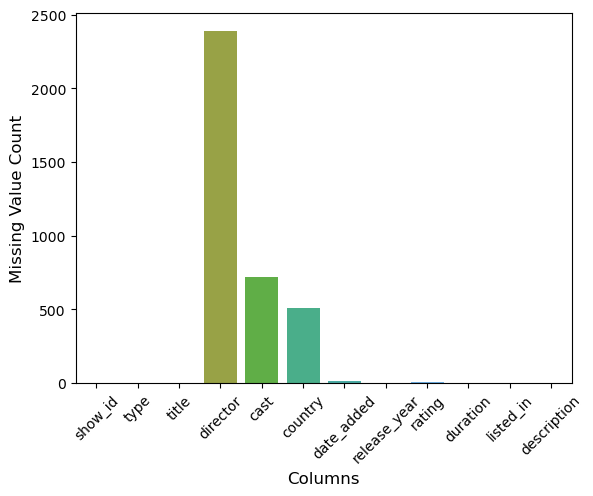

In [14]:
# visualize missing values in a DataFrame
miss_val = df.isnull().sum()
sns.barplot(x=miss_val.index,y = miss_val.values)
plt.xticks(rotation=45)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Value Count', fontsize=12)
plt.show()

In [15]:
# checking the percentage of the missing values of column having missing values
for col in df.columns.tolist():
    if df[col].isnull().sum() > 0:
        per_null = df[col].isnull().sum() / len(df) *100
        print(f'{col}, percentage of null value is: {round(per_null,2)} %')
        print('*'*20)

director, percentage of null value is: 30.68 %
********************
cast, percentage of null value is: 9.22 %
********************
country, percentage of null value is: 6.51 %
********************
date_added, percentage of null value is: 0.13 %
********************
rating, percentage of null value is: 0.09 %
********************


#### Observation:

~ The presence of 30% null values in the director column significantly impacts our analysis. These missing values pose challenges and affect the completeness of our data.

~ Given this scenario:
  1. To address missing country entries, we'll replace them with the mode (most common) country to maintain data integrity.
  2. Retaining the director information is valuable as it provides insights into a particular filmmaker's body of work. To mitigate the impact of null values, we'll replace them with the placeholder 'unknown' for continued analysis.
  3. Similarly, preserving the cast information is beneficial for studying the films associated with specific actors. To handle missing values, we'll substitute them with 'unknown' to maintain the continuity of our analysis.

#### Handling missing values

In [16]:
# replacing the missing values of director column with 'unknow'
df['director'].replace(np.nan,'unknow',inplace=True)

In [17]:
# replacing the missing values of country column with most common one
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [18]:
# replacing the missing values of cast column with 'nocast'
df['cast'].replace(np.nan,'nocast',inplace=True)

In [19]:
# replacing the missing values of rating column with most common one
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

In [20]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

~ *Missing value of date_added are very less, so better way is to remove it.*

In [21]:
df.dropna(subset = ['date_added'],inplace = True)

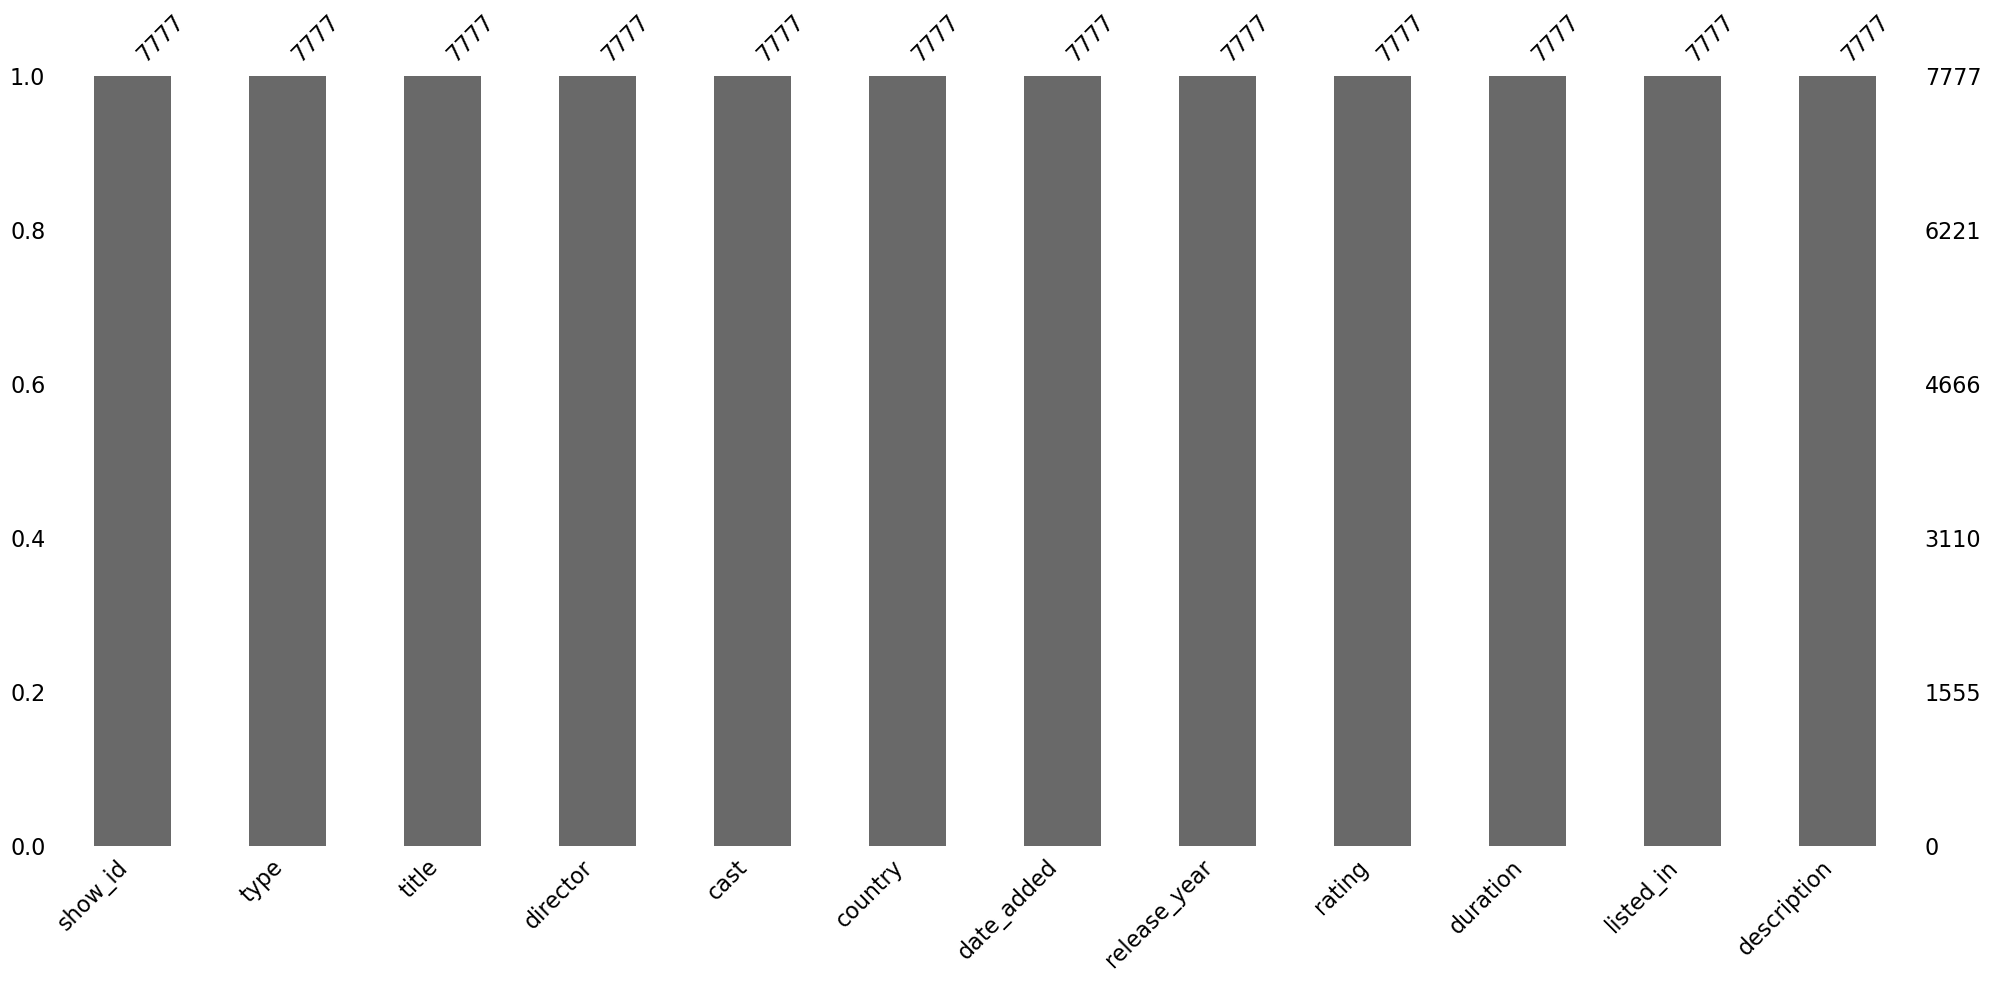

In [22]:
# displaying missing value existance.
msno.bar(df)
plt.show()

In [23]:
# checking for null values now
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

*~ Imputed all the null values.*

In [24]:
# checking for the duplicate values
df.duplicated().sum()

0

*~ There are no Duplicate values in the dataset.*

### Data Manupulation

*~ We'll create additional columns to enhance our analysis.*

In [25]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [26]:
# Converting object 'date_added' column to data-time format
df['date_added'] = pd.to_datetime(df['date_added'])

In [27]:
# creating column year_added from date_added
df['year_added'] = df['date_added'].dt.year

In [28]:
# creating column year_added from date_added
df['month_added'] = df['date_added'].dt.month_name()

In [29]:
# obtaning the principle country for simplification

In [30]:
df['principle_country']= df['country'].apply(lambda x: x.split(',')[0])

In [31]:
df['principle_country'].sample(5)

1956           Mexico
7625    United States
5173           Turkey
4308            India
3571            China
Name: principle_country, dtype: object

*~ For simplification regenrating the rating column on the basis of Adult,Teen,child for rating: 'TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan, 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR',  which seems quite unease to understand.*  

~ For simplification purposes, you could categorize them into broader groups like:

    - Adult (TV-MA, R, NC-17)  
    - Teen (PG-13, TV-14, TV-PG, PG)  
    - Child (TV-G, TV-Y, TV-Y7, TV-Y7-FV)  
    - Unrated/Not Specified (NR, UR)

In [32]:
# creating function to apply age category 
def simplify_rating(rating):
    if rating in ['TV-MA', 'R', 'NC-17']:
        return 'Adult'
    elif rating in ['PG-13', 'TV-14', 'TV-PG', 'PG']:
        return 'Teen'
    elif rating in ['TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV']:
        return 'Child'
    else:
        return 'Unrated/Not Specified'

In [33]:
# applying simplify_rating function on rating column
df['age_rating'] = df['rating'].apply(simplify_rating)

### Data Visualisation

In [34]:
# separating the dataset based on the tv shows and movies
df_tv_show = df[df['type']=='TV Show']
df_movies = df[df['type']=='Movie']

#### Content type count respectively

In [35]:
# applying value count the to get the no of individual count of movies and tv shows
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

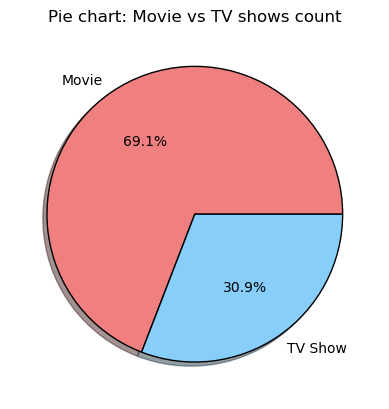

In [36]:
# diplaying the no of movies and tv shows available on netflix
portion = df['type'].value_counts().values.tolist()
slices = df['type'].value_counts().index.tolist()

# plt.style.use('fivethirtyeight')
plt.pie(portion, labels=slices,autopct='%1.1f%%',colors=['lightcoral', 'lightskyblue'],shadow = True, wedgeprops={'edgecolor':'black'})

plt.title('Pie chart: Movie vs TV shows count',fontsize = 12)
plt.show()

*~ Observation: There are around 69% movies and 31% tv shows on netflix.* 

#### Content (movies and tv shows) added over the years

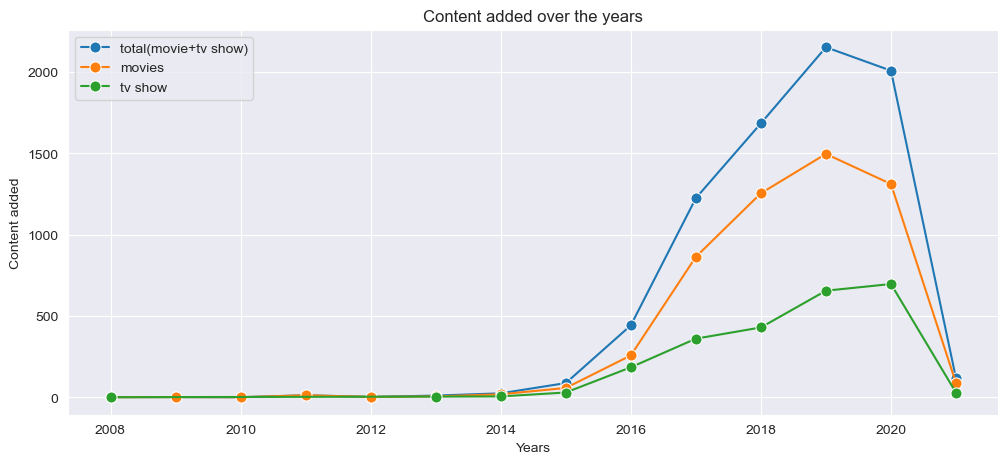

In [37]:
# total(movies plus tv shows)
total = df.groupby('year_added')['type'].count()
total_x = total.index.tolist()
total_y = total.values.tolist()

# from movies dataframe
movies = df_movies.groupby('year_added')['type'].count()
movies_x = movies.index.tolist()
movies_y = movies.values.tolist()

# from tv show dataframe
tv_show = df_tv_show.groupby('year_added')['type'].count()
tv_show_x = tv_show.index.tolist()
tv_show_y = tv_show.values.tolist()

# plotting combine line plot for total, movies and tv shows added over year respectivly

sns.set_style("darkgrid")
plt.figure(figsize=(12,5))

sns.lineplot(data=total, x=total_x, y=total_y,marker = 'o',markersize = 8, label ='total(movie+tv show)')

sns.lineplot(data=movies, x=movies_x, y=movies_y,marker = 'o',markersize = 8, label ='movies')

sns.lineplot(data=tv_show, x=tv_show_x, y=tv_show_y,marker = 'o',markersize = 8, label ='tv show')

plt.xlabel('Years')
plt.ylabel('Content added')
plt.title('Content added over the years')
plt.legend()

plt.show()

*~ Observations:*

  - This graph provides an interesting insight into the content addition trends over the years.  
       
  - There was a steady increase in the total content added from 2008 to around 2016. After 2016, there was a dramatic spike, peaking in 2018. However, there was a sharp decline in total content added by 2020 possibly due to Covid.  
       
   - Rate of Addition: Both movies and TV shows saw an increase in the rate of content addition around 2016. However, the rate of addition for movies was more consistent prior to 2016, while TV shows remained relatively flat.  

   - Peak Content Addition: Both categories peaked around 2018, but the number of movies added appears to be higher than TV shows at this point.  

   - Post-Peak Decline: After the peak in 2018, both categories saw a decline. However, the decline in the addition of movies seems to be more drastic compared to TV shows.  

   - Overall Volume: Over the entire period from 2008 to 2020, more movies were added than TV shows, as indicated by the higher position of the ‘movies’ line on the graph.  

#### Content (movies and tv shows) release over the years

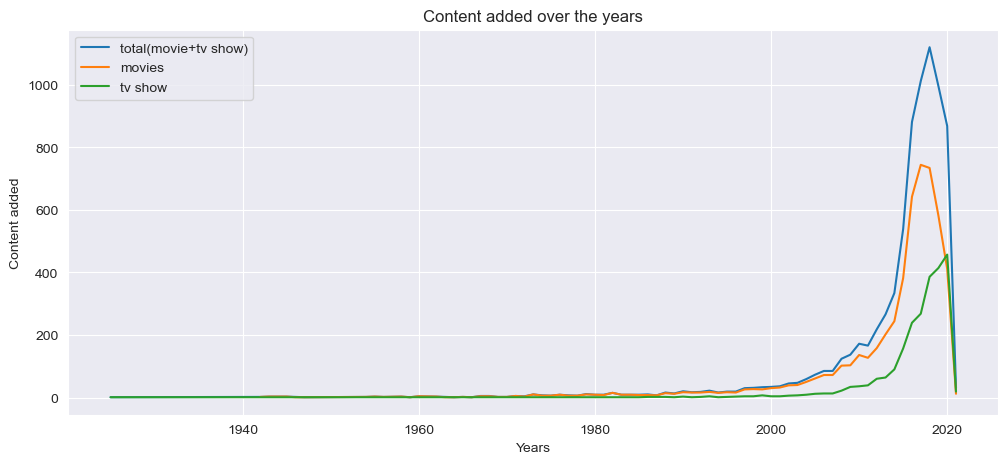

In [38]:
# total(movies plus tv shows)
total = df.groupby('release_year')['type'].count()
total_x = total.index.tolist()
total_y = total.values.tolist()

# from movies dataframe
movies = df_movies.groupby('release_year')['type'].count()
movies_x = movies.index.tolist()
movies_y = movies.values.tolist()

# from tv show dataframe
tv_show = df_tv_show.groupby('release_year')['type'].count()
tv_show_x = tv_show.index.tolist()
tv_show_y = tv_show.values.tolist()

# plotting combine line plot for total, movies and tv shows added over year respectivly

sns.set_style("darkgrid")
plt.figure(figsize=(12,5))

sns.lineplot(data=total, x=total_x, y=total_y, label ='total(movie+tv show)')

sns.lineplot(data=movies, x=movies_x, y=movies_y, label ='movies')

sns.lineplot(data=tv_show, x=tv_show_x, y=tv_show_y, label ='tv show')

plt.xlabel('Years')
plt.ylabel('Content added')
plt.title('Content added over the years')
plt.legend()

plt.show()

*~ Observations:*

   - Rate of Addition: Both movies and TV shows saw an increase in the rate of content addition around the early 2000s. However, the rate of addition for movies was more significant, with a sharp peak around 2020.

   - Peak Content Addition: Both categories peaked around or just after 2020, but the number of movies added appears to be higher than TV shows at this point.

   - Overall Volume: Over the entire period from 1940 to beyond 2020, more movies were added than TV shows, as indicated by the higher position of the ‘movies’ line on the graph. 
 

#### Rating analysis

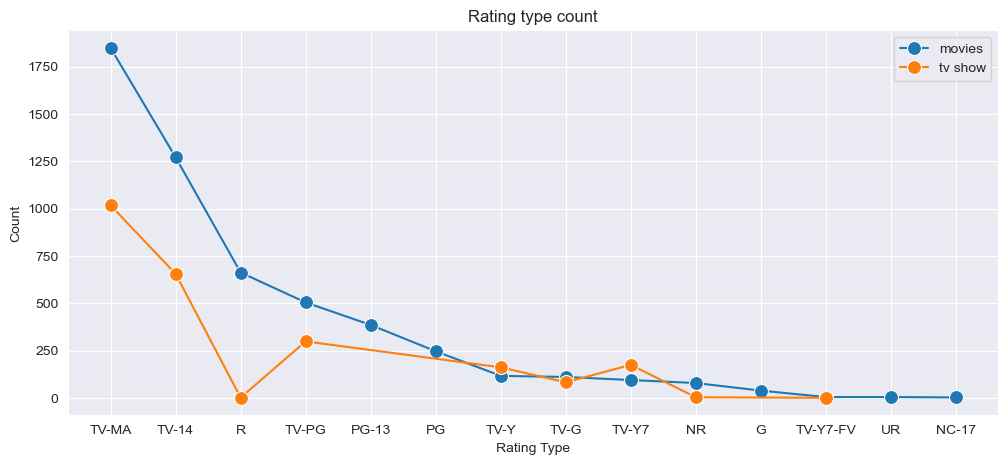

In [39]:
# Plotting lineplot for rating for movies and tv shows

# from movies dataframe
movies = df_movies.groupby('rating')['show_id'].count().sort_values(ascending=False)
movies_x = movies.index.tolist()
movies_y = movies.values.tolist()

# from tv show dataframe
tv_show = df_tv_show.groupby('rating')['show_id'].count().sort_values(ascending=False)
tv_show_x = tv_show.index.tolist()
tv_show_y = tv_show.values.tolist()


sns.set_style("darkgrid")
plt.figure(figsize=(12,5))

sns.lineplot(data=movies, x=movies_x, y=movies_y,marker = 'o',markersize = 10, label ='movies')

sns.lineplot(data=tv_show, x=tv_show_x, y=tv_show_y,marker = 'o',markersize = 10, label ='tv show')

plt.xlabel('Rating Type')
plt.ylabel('Count')
plt.title('Rating type count')
plt.legend()

plt.show()

*~ Observation:*
- TV-MA is the most common rating for movies, while TV-14 is the most common for TV shows. This suggests that movies tend to have more mature content compared to TV shows.
- The count of movies drops significantly after the TV-MA category, indicating a lesser variety of content ratings for movies. On the other hand, the count of TV shows decreases more gradually, suggesting a wider distribution of content ratings.
- Movies see a slight increase in the count at R and PG-13 ratings, which is not observed for TV shows. This could indicate a higher production of movies suitable for teen and adult audiences.
- Both movies and TV shows have minimal counts in categories like NR, G, Y7-FV, UR, and NC-17. However, the low count is more pronounced for movies, suggesting that TV shows cater more to these niche categories.

#### Rating analysis based age groups

~ For simplification purposes, you could categorize them into broader groups like:

    - Adult (TV-MA, R, NC-17)  
    - Teen (PG-13, TV-14, TV-PG, PG)  
    - Child (TV-G, TV-Y, TV-Y7, TV-Y7-FV)  
    - Unrated/Not Specified (NR, UR)

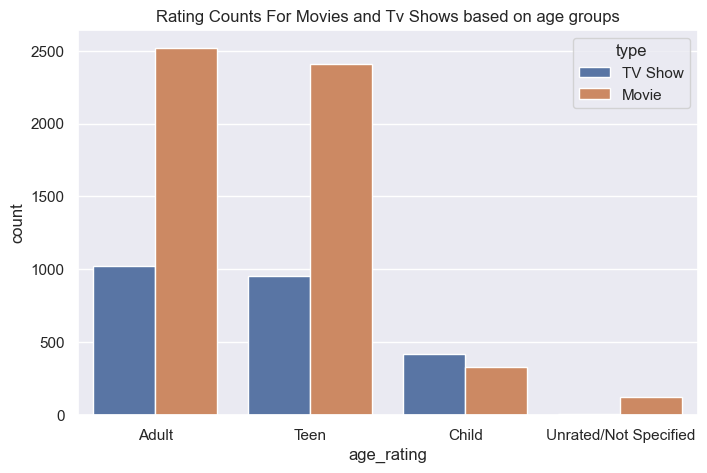

In [40]:
# Plotting the camparision based Age group by count plot
sns.set()
plt.figure(figsize=(8,5))
ax=sns.countplot(x="age_rating",data= df,hue= "type",order = df['age_rating'].value_counts().index[0:15])
plt.title("Rating Counts For Movies and Tv Shows based on age groups")
plt.show()

*~ Observation:*
- Adult: There are significantly more movies than TV shows. This suggests that a large portion of movie content is targeted towards adults.
- Teen: While movies again outnumber TV shows, the difference is not as pronounced as in the adult category. This indicates that both movies and TV shows cater to the teen audience, but movies do so more.
- Child: The number of TV shows is higher than movies. This could be because TV shows, with their episodic nature, might be more engaging for children.
- Unrated/Not Specified: A small number of both movies and TV shows fall into this category, with movies being slightly more. This could include niche content or those that don’t fit into the standard rating categories.

#### Country analysis

In [41]:
# Top 15 countries count for content they produce
df.groupby('principle_country')['show_id'].count().sort_values(ascending=False).head(15)

principle_country
United States     3383
India              956
United Kingdom     576
Canada             259
Japan              236
France             196
South Korea        194
Spain              168
Mexico             123
Australia          107
Turkey             106
Egypt              105
Germany             92
China               86
Taiwan              82
Name: show_id, dtype: int64

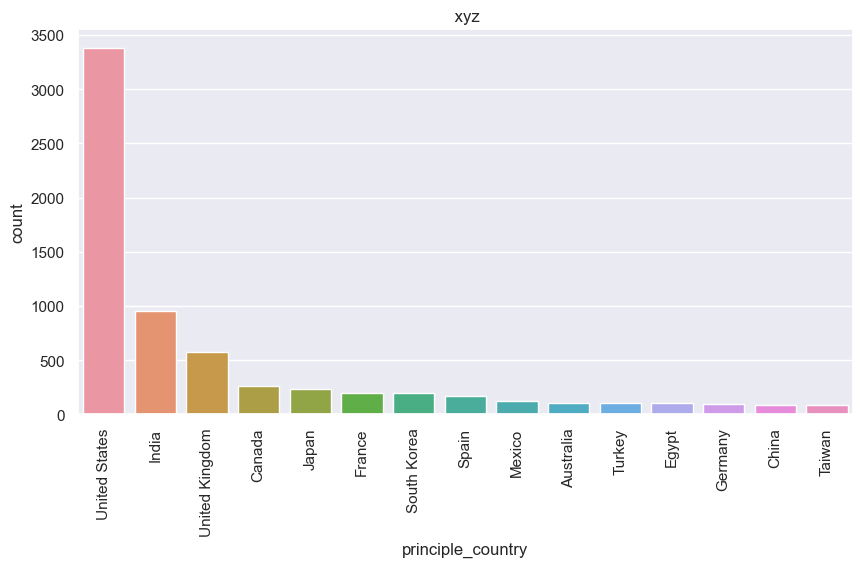

In [42]:
# Plotting top 15 countries count for content they produce

sns.set()
plt.figure(figsize=(10,5))
ax=sns.countplot(x="principle_country",data= df,order = df['principle_country'].value_counts().index[0:15])
plt.title(" xyz")
plt.xticks(rotation = 90)
plt.show()

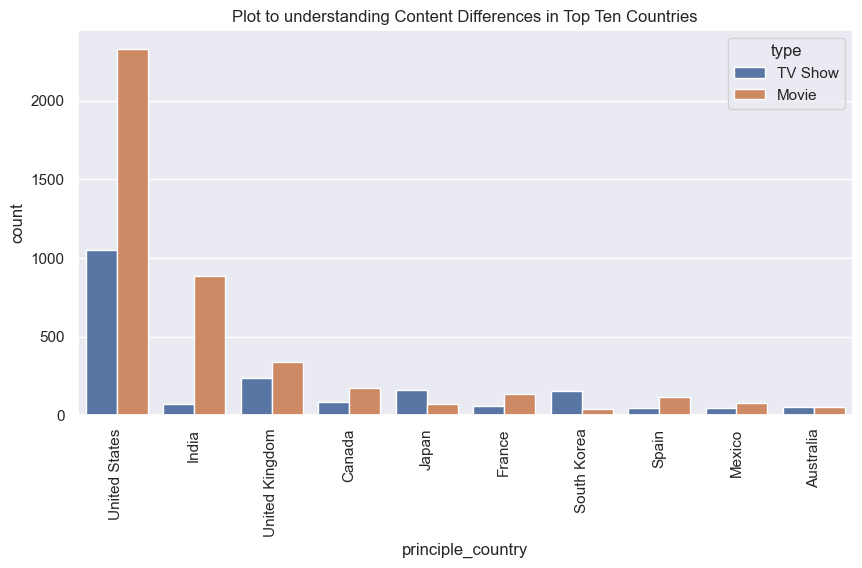

In [43]:
# Plotting top 10 countries count for content they produce

sns.set()
plt.figure(figsize=(10,5))
ax=sns.countplot(x="principle_country",data= df, hue='type', order = df['principle_country'].value_counts().index[0:10])
plt.title('Plot to understanding Content Differences in Top Ten Countries')
plt.xticks(rotation = 90)
plt.show()

*~ Obserations:*
- Countries:
  - United States: The United States has the highest count of both movies and TV shows, with movies being significantly more.
  - India: India follows but with a higher count of movies compared to TV shows.
  - United Kingdom: The United Kingdom has a balanced count but lesser in number.
  - Canada, Japan, France, South Korea, Spain, Mexico, and Australia: These countries have relatively lower counts.

- Content:
  - Movies: Movies are more prevalent in the United States and India.
  - TV Shows: TV Shows are more common in the United Kingdom compared to other countries except the U.S. and India.
  - Balanced Content: In Canada, Japan, France, South Korea, Spain Mexico and Australia there is a balanced yet low count of both content types

#### Duration analysis

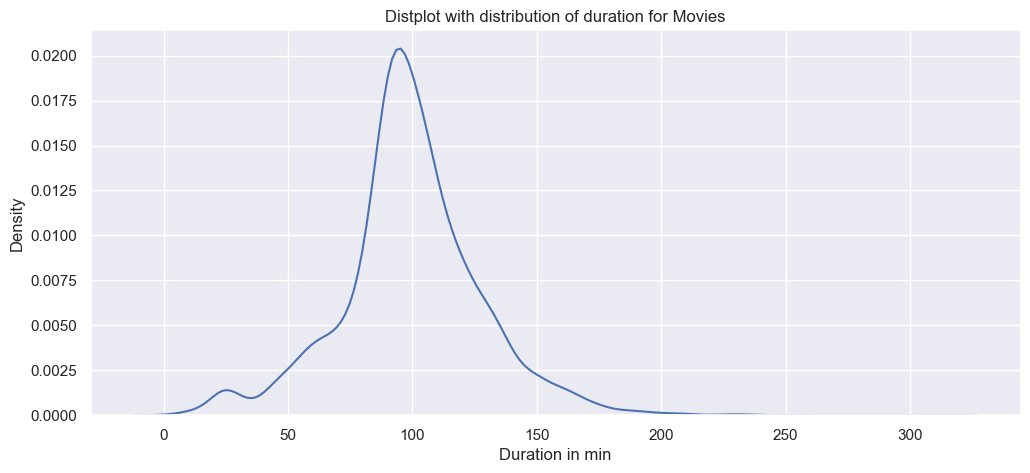

In [44]:
# plotting the distribution of duration(in min) of movies 
time_df = df_movies['duration'].str.extract('(\d+)')
time_df = time_df.rename(columns={0:'duration'})
time_df['duration'] = pd.to_numeric(time_df['duration'], errors='coerce')

plt.figure(figsize=(12,5))
sns.kdeplot(data=time_df,x='duration')
plt.title('Distplot with distribution of duration for Movies')
plt.xlabel('Duration in min')
plt.show()

~ *Observations:*   
- Most movies have a runtime falling within the range of 80 to 120 minutes, which is considered stand. 

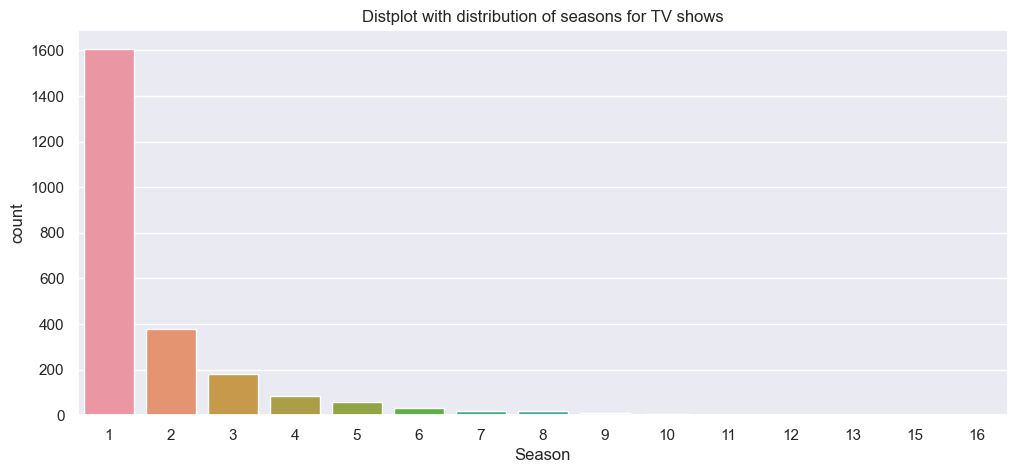

In [45]:
# plotting the distribution of season of TV shows 
season_df = df_tv_show['duration'].str.extract('(\d+)')
season_df = season_df.rename(columns={0:'seasons'})
season_df['seasons'] = pd.to_numeric(season_df['seasons'], errors='coerce')

plt.figure(figsize=(12,5))
sns.countplot(data=season_df,x='seasons')
plt.title('Distplot with distribution of seasons for TV shows')
plt.xlabel('Season')
plt.show()

~ *Observations:*   
    
   - Based on the countplot, most of the 1608 television shows had only one season, with very few having more than six seasons. 

#### Analysis of Movie genres

In [46]:
# dataframe for Movies : df_movies

In [47]:
def genres_counter(col):
    
    ''' Below expression sorts the genres and their frequencies in descending order of 
    occurrence, allowing you to see which genres are most prevalent in the dataset.'''
    
    listed_gen = list(col)
    
    gen = []

    for i in listed_gen:
        i = i.split(',')
        for j in i:
            gen.append(j.replace(" ",""))
            
    gen_counter = {k:v for k, v in sorted(Counter(gen).items(), key = lambda item: item[1], reverse = True)}
        
    return gen_counter 

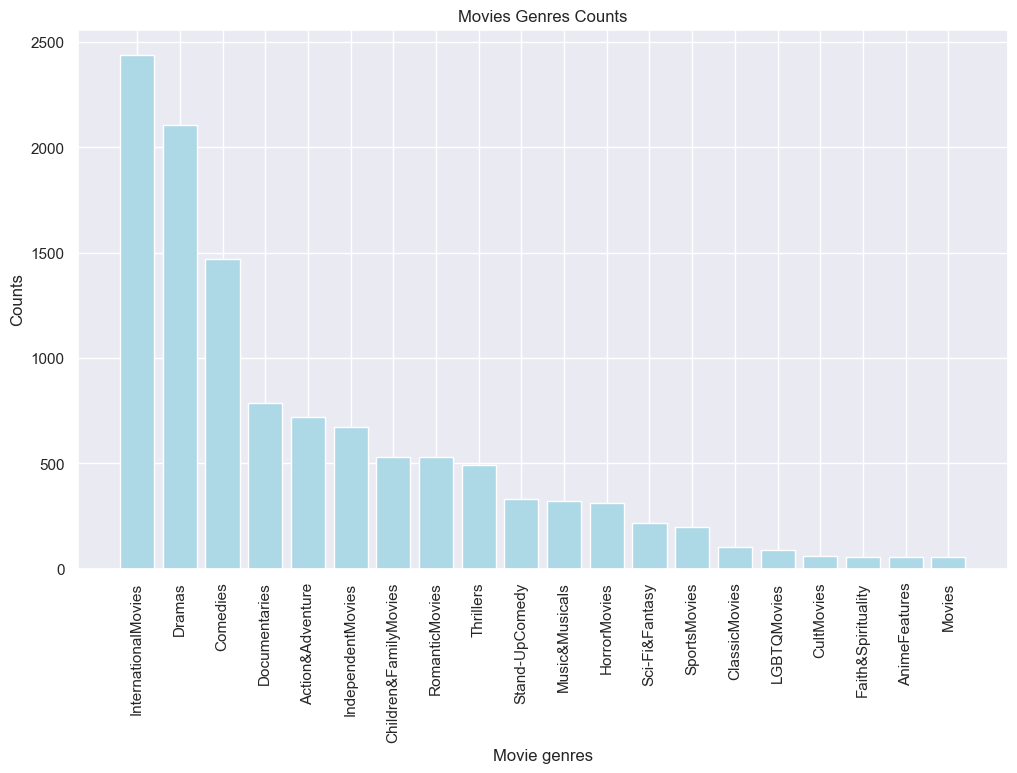

In [48]:
# top 10 genres by separating individually
g = genres_counter(df_movies['listed_in'])

categories = list(g.keys())
counts = list(g.values())

# Create a bar plot
plt.figure(figsize=(12, 7))
plt.bar(categories, counts, color = 'lightblue')
plt.xlabel('Movie genres')
plt.ylabel('Counts')
plt.title('Movies Genres Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

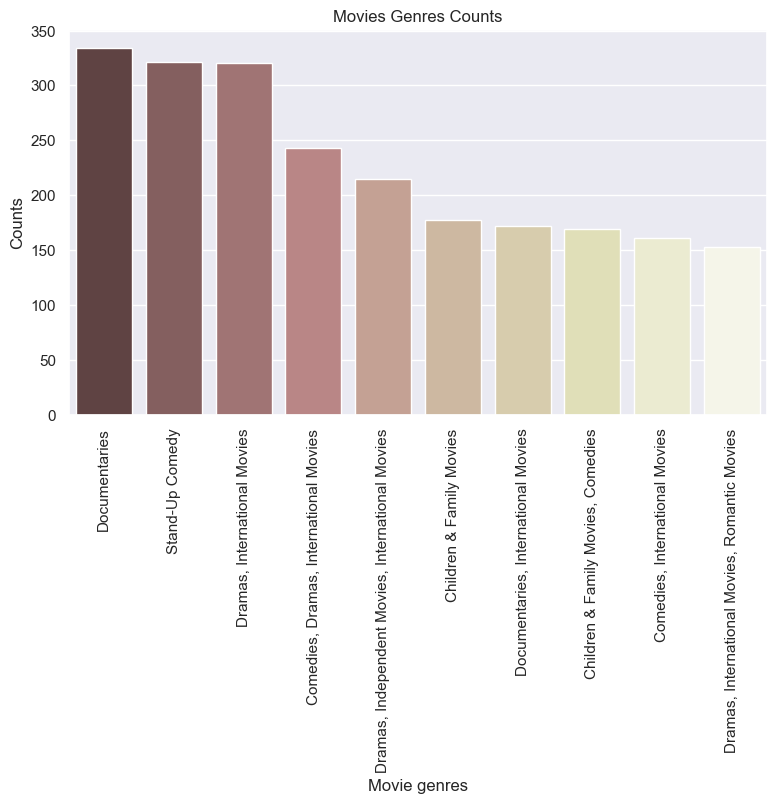

In [49]:
# top 10 genres by without separating individually

plt.figure(figsize=(9, 5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xlabel('Movie genres')
plt.ylabel('Counts')
plt.title('Movies Genres Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

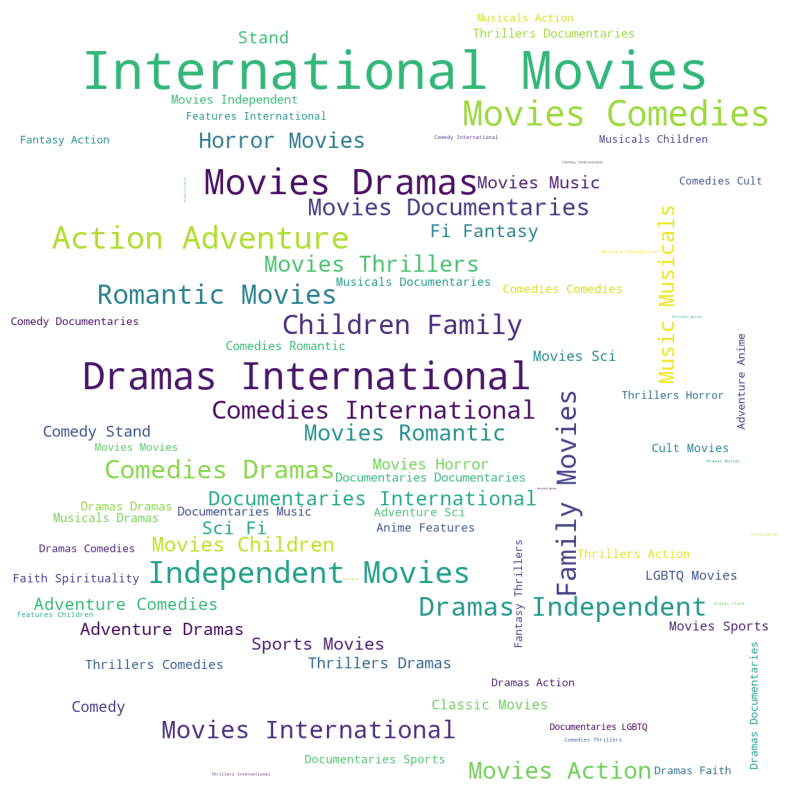

In [50]:
# plotting Wordcloud for the Movie genres

text = ' '.join(df_movies['listed_in'])

plt.figure(figsize=(13, 10))
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

*~ Obsevations:*

    - The word cloud presents highlighting the diversity of movie genres, with Action, Comedies, Dramas, and International Movies being prominent.

#### Analysis of TV show genres

In [51]:
# dataframe for TV show : df_tv_show

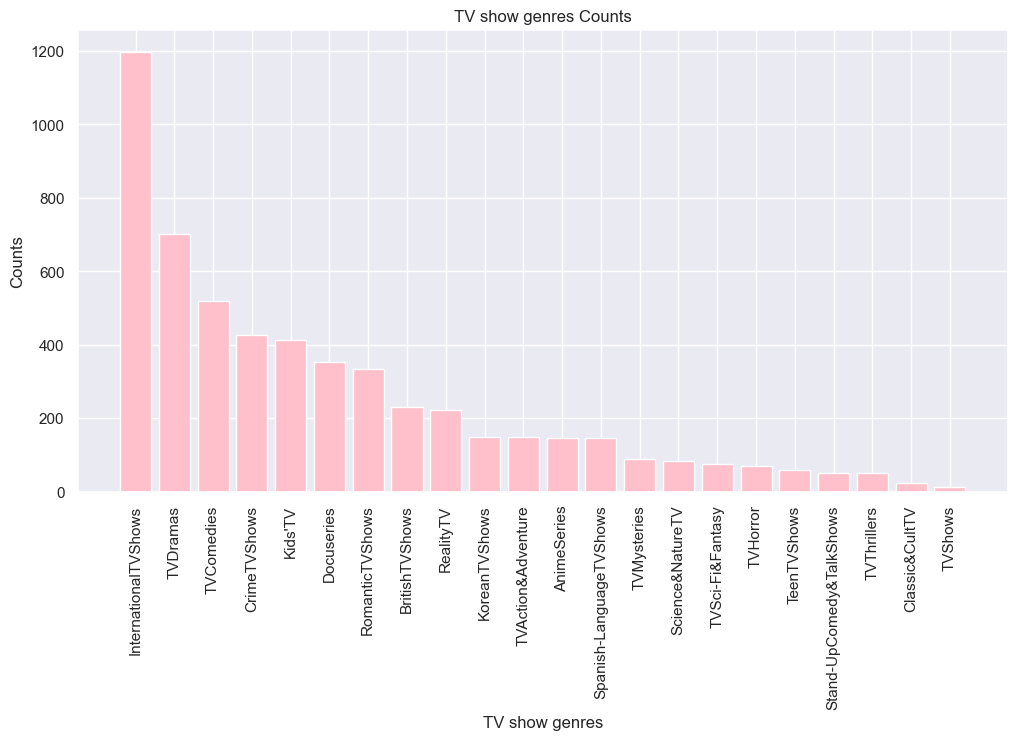

In [52]:
# top 10 genres by separating individually
g = genres_counter(df_tv_show['listed_in'])

categories = list(g.keys())
counts = list(g.values())

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(categories, counts, color = 'pink')
plt.xlabel('TV show genres')
plt.ylabel('Counts')
plt.title('TV show genres Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

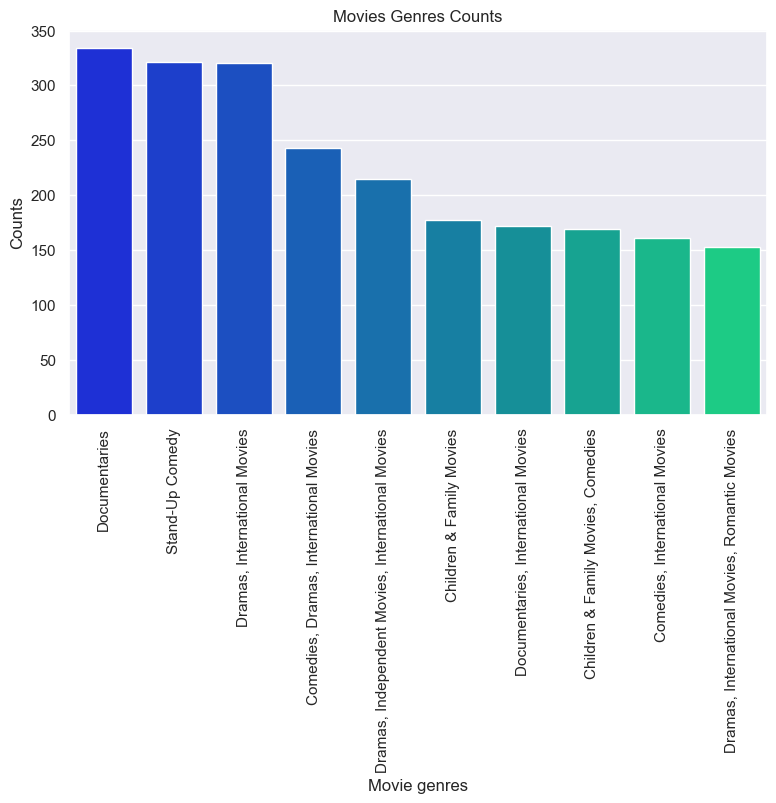

In [53]:
# top 10 genres by without separating individually

plt.figure(figsize=(9, 5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="winter")
plt.xlabel('Movie genres')
plt.ylabel('Counts')
plt.title('Movies Genres Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

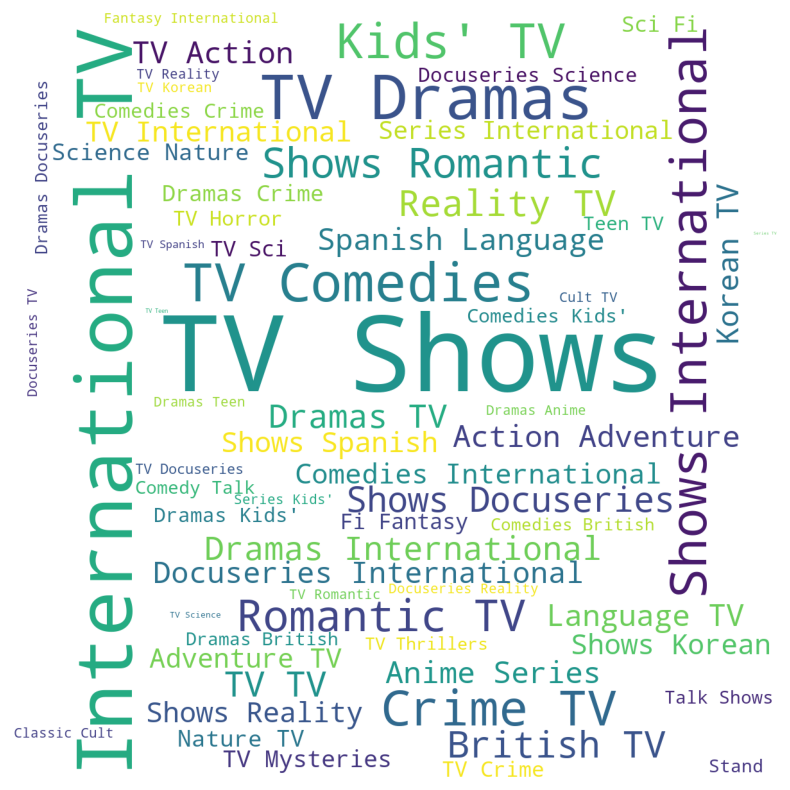

In [54]:
# plotting Wordcloud for the TV show genres

text = ' '.join(df_tv_show['listed_in'])

plt.figure(figsize=(13, 10))
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

*~ Obsevations:*

    - The word cloud represent the wide range of TV show genres, with "TV Shows," "International," "Dramas," and "Comedies" being particularly prominent.

#### Top 10 director

In [55]:
# creating the director data set without unknown value for simplification
direct_df = df[df['director'] != 'unknow']

def direct_counter(col):
    
    ''' Below expression sorts the director and their frequencies in descending order of 
    occurrence, allowing you to see which cast are most prevalent in the dataset.'''
    
    director = col
    
    d_counter = {k:v for k, v in sorted(Counter(director).items(), key = lambda item: item[1], reverse = True)}
    
    return d_counter  

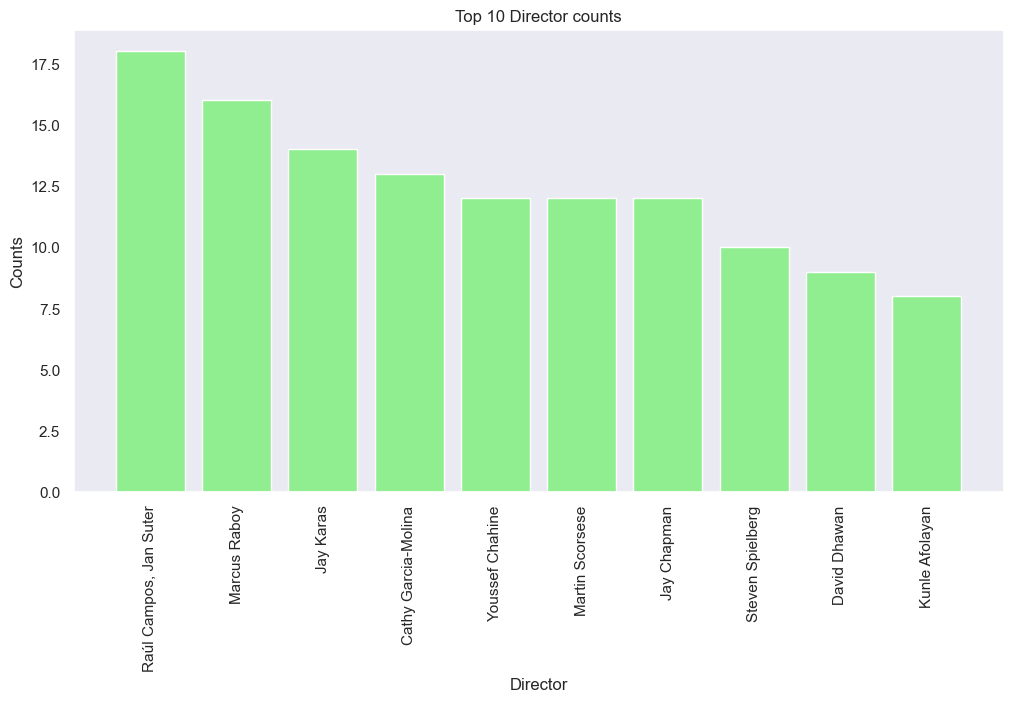

In [56]:
# PLotting the Top 10 actors in TV shows

d = direct_counter(direct_df['director'])

categories = list(d.keys())
counts = list(d.values())

# Create a bar plot
sns.set_style('dark')
plt.figure(figsize=(12, 6))
plt.bar(categories[0:10], counts[0:10], color = 'lightgreen')
plt.xlabel('Director')
plt.ylabel('Counts')
plt.title('Top 10 Director counts')
plt.xticks(rotation=90)

plt.show()

#### Top 10 Actors for Movies

In [57]:
def cast_counter(col):
    
    ''' Below expression sorts the cast and their frequencies in descending order of 
    occurrence, allowing you to see which cast are most prevalent in the dataset.'''
    
    listed_cast = list(col)
    
    cast = []

    for i in listed_cast:
        i = i.split(',')
        for j in i:
            cast.append(j.replace(" ",""))
            
    cast_counter = {k:v for k, v in sorted(Counter(cast).items(), key = lambda item: item[1], reverse = True)}
        
    return cast_counter 

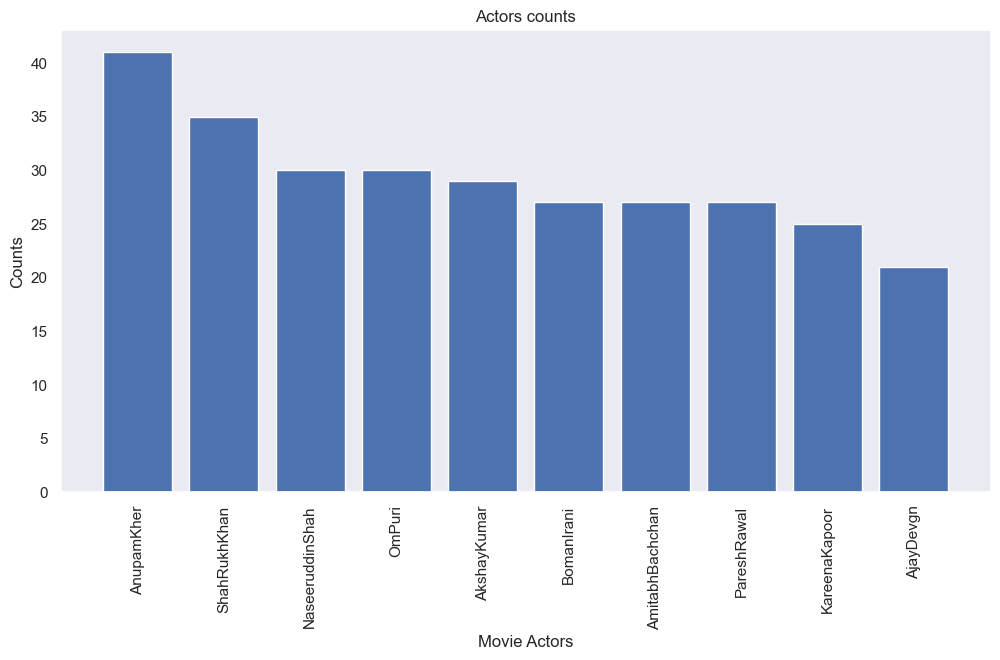

In [58]:
# PLotting the Top 10 actors in Movies
c = cast_counter(df_movies['cast'])

categories = list(c.keys())
counts = list(c.values())

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(categories[1:11], counts[1:11])
plt.xlabel('Movie Actors')
plt.ylabel('Counts')
plt.title('Actors counts')
plt.xticks(rotation=90)

plt.show()

#### Top 10 Actors for TV shows

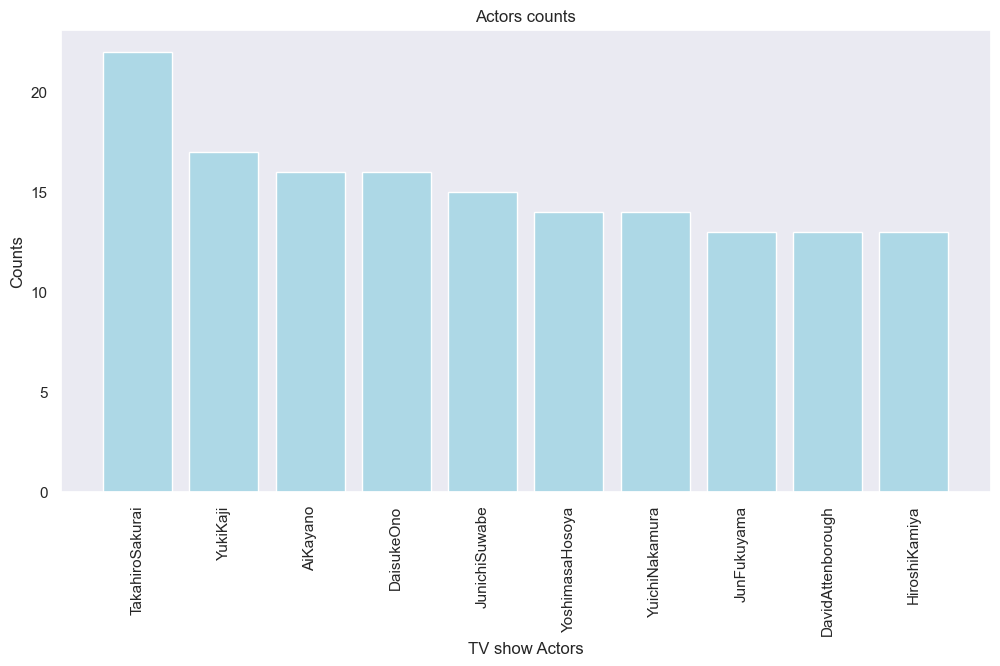

In [59]:
# PLotting the Top 10 actors in TV shows
t = cast_counter(df_tv_show['cast'])

categories = list(t.keys())
counts = list(t.values())

# Create a bar plot
sns.set_style('dark')
plt.figure(figsize=(12, 6))
plt.bar(categories[1:11], counts[1:11], color = 'lightblue')
plt.xlabel('TV show Actors')
plt.ylabel('Counts')
plt.title('Actors counts')
plt.xticks(rotation=90)

plt.show()

### Feature Engineering
 
#### Textual Data Preprocessing   

In [60]:
# Combining the listed columns into one
df_1 = df.copy()
df_1['text_info'] = df_1['listed_in'] +' '+ df_1['rating'] + ' ' + df_1['description'] + ' ' + df_1['director'] + ' ' + df_1['cast'] + ' ' + df_1['country']

In [61]:
df_1['text_info'][0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy TV-MA In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. unknow João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil'

#### Text Cleaning

In [62]:
# We'll generate clusters from the text-based columns in our dataset.

# Initializing
cluster_df = df[['title']]

# Combining Textual Data
df[['description','listed_in','director','cast','country','rating']] = df[['description','listed_in','director','cast','country','rating']].astype(str)

cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating'])

# Setting Index
cluster_df.set_index('title', inplace = True)

# Preparing Bag of Words
bag_of_words = cluster_df.cluster_data

In [63]:
# funtion to eliminate anything that isn't an alphabet
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

# We'll implement the above function on our merged column.
df_1['text_info'] = df_1['text_info'].apply(clean_text)

# will transform all the words into lowercase
df_1['text_info'] = df_1['text_info'].str.lower()
df_1['text_info'][0]

'international tv shows tv dramas tv scifi  fantasy tvma in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor unknow joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil'

#### Tokenization

In [64]:
# funtion to tokenize the textual data

def tokenizer(txt):
    tok = word_tokenize(txt)
    return tok

df_1['proceed_text'] = df_1['text_info'].apply(tokenizer)

print(df_1['proceed_text'][0])

['international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'tvma', 'in', 'a', 'future', 'where', 'the', 'elite', 'inhabit', 'an', 'island', 'paradise', 'far', 'from', 'the', 'crowded', 'slums', 'you', 'get', 'one', 'chance', 'to', 'join', 'the', 'saved', 'from', 'squalor', 'unknow', 'joo', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zez', 'motta', 'celso', 'frateschi', 'brazil']


#### Punctuation

In [65]:
# Punctuation
exclude = string.punctuation

def remove_punc(text):
    '''function to remove punctuation'''
    return [''.join(ch for ch in sub_text if ch not in exclude) for sub_text in text]

# Applying punct remove function to required col
df_1['proceed_text'] = df_1['proceed_text'].apply(remove_punc)

#### Removing Stopword

In [66]:
# storing stopwords
sw = stopwords.words('english')

def remove_sw(text):
    '''function to remove stopword'''
    stpw = set(sw)
    filtered_w = [word for word in text if word.lower() not in stpw]
    return filtered_w

# Applying stopword remove function to required col
df_1['proceed_text'] = df_1['proceed_text'].apply(remove_sw)

print(df_1['proceed_text'][0])

['international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'tvma', 'future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'unknow', 'joo', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zez', 'motta', 'celso', 'frateschi', 'brazil']


#### Lemmatization

In [67]:
'''Lemmatization is the process of reducing words to their base or dictionary
form (called a lemma) to normalize variations of the same word.'''

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_word(txt):
    return [lemmatizer.lemmatize(word) for word in txt]

# Applying lemmatization function to required col
df_1['proceed_text'] = df_1['proceed_text'].apply(lemmatize_word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [68]:
def get_words(row):
    return ' '.join(row)

df_1['proceed_text'] = df_1['proceed_text'].apply(get_words)

In [69]:
df_1['proceed_text'][0]

'international tv show tv drama tv scifi fantasy tvma future elite inhabit island paradise far crowded slum get one chance join saved squalor unknow joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil'

#### TF - IDF (Term Frequency-Inverse Document Frequency)

In [70]:
'''TF-IDF is a statistical measure used in natural language processing and information retrieval 
to evaluate the importance of a term in a document relative to a collection of documents.'''

words = df_1['proceed_text']

tfidf = TfidfVectorizer(max_features = 5000)    
X = tfidf.fit_transform(words)

# convert X into array form for clustering
X = X.toarray()

X.shape

(7777, 5000)

### Dimentionality reduction: PCA (Principle component analysis)

    - Here applying PCA to TF-IDF matrices allows for a more compact representation of text data, reducing the number of features while maintaining the most significant information present in the documents, which can be beneficial for various text analysis tasks.

In [71]:
pca = PCA()
pca.fit(X)

PCA()

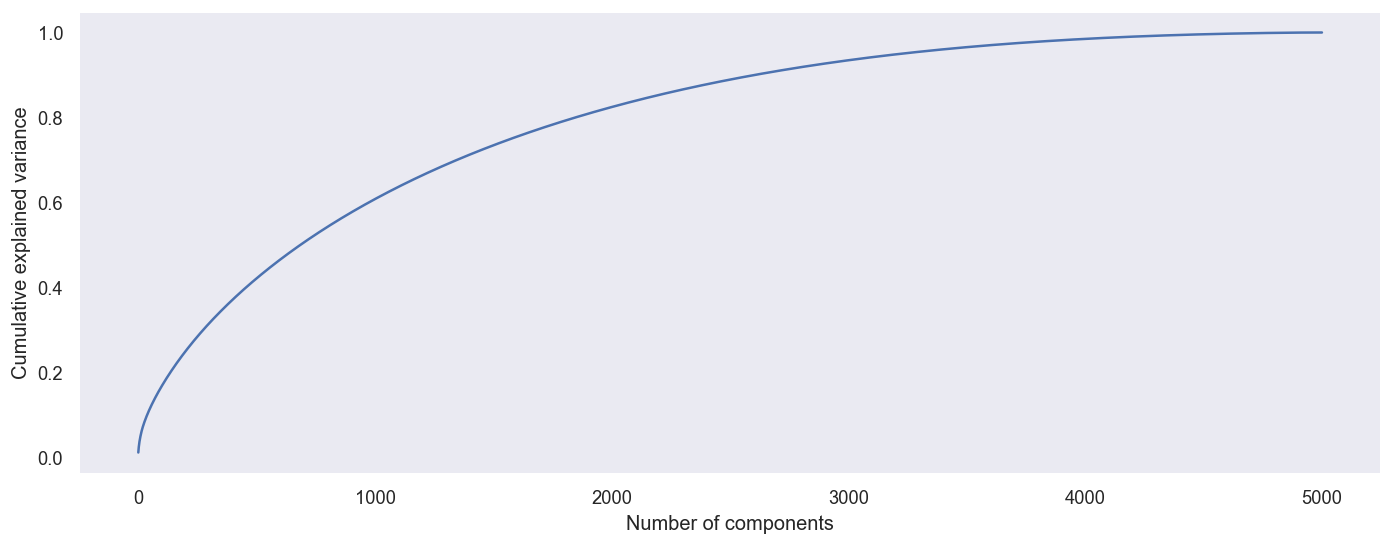

In [72]:
# Graph to show the cumulative explained variance by the principal components of your data. 

plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.show()

*~ From the plot above, it's evident that around 95% of the variance is accounted for by 5000 components.*

In [73]:
# optimum value based on experiments
pca_tuned = PCA(n_components=0.05)
pca_tuned.fit(X)
X = pca_tuned.transform(X)
X.shape

(7777, 10)

### Model Building

#### K-Means Clustering

In [74]:
# standardising the data
scaler=MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [75]:
silhouette_s_ = []
sum_sq_dist = {}
n_cluster = [i for i in range(2,20)]

for n in n_cluster:
    cluster = KMeans(n_clusters=n, n_init=10,random_state=40)
    f = cluster.fit(scaled_X)
    p = cluster.predict(scaled_X)
    sum_sq_dist[n] = cluster.inertia_
    
    silhouette_s_.append([int(n),round(silhouette_score(scaled_X, p),3)])
    

In [76]:
silhouette_s_

[[2, 0.249],
 [3, 0.22],
 [4, 0.217],
 [5, 0.198],
 [6, 0.235],
 [7, 0.208],
 [8, 0.286],
 [9, 0.261],
 [10, 0.277],
 [11, 0.279],
 [12, 0.289],
 [13, 0.285],
 [14, 0.281],
 [15, 0.279],
 [16, 0.27],
 [17, 0.272],
 [18, 0.278],
 [19, 0.273]]

In [77]:
sum_sq_dist

{2: 1090.9473154510436,
 3: 975.3351983933187,
 4: 870.711442220395,
 5: 794.8757889979795,
 6: 712.7052187900006,
 7: 665.8692698866865,
 8: 586.9615706465049,
 9: 541.852759676133,
 10: 485.4379506296347,
 11: 453.51628890907,
 12: 426.8169711125474,
 13: 407.6221006083899,
 14: 392.47418491625507,
 15: 382.0222655003763,
 16: 367.2385995968652,
 17: 355.1431423705342,
 18: 344.6087348258128,
 19: 336.45035462402774}

#### Using Elbow method to find the optimum k

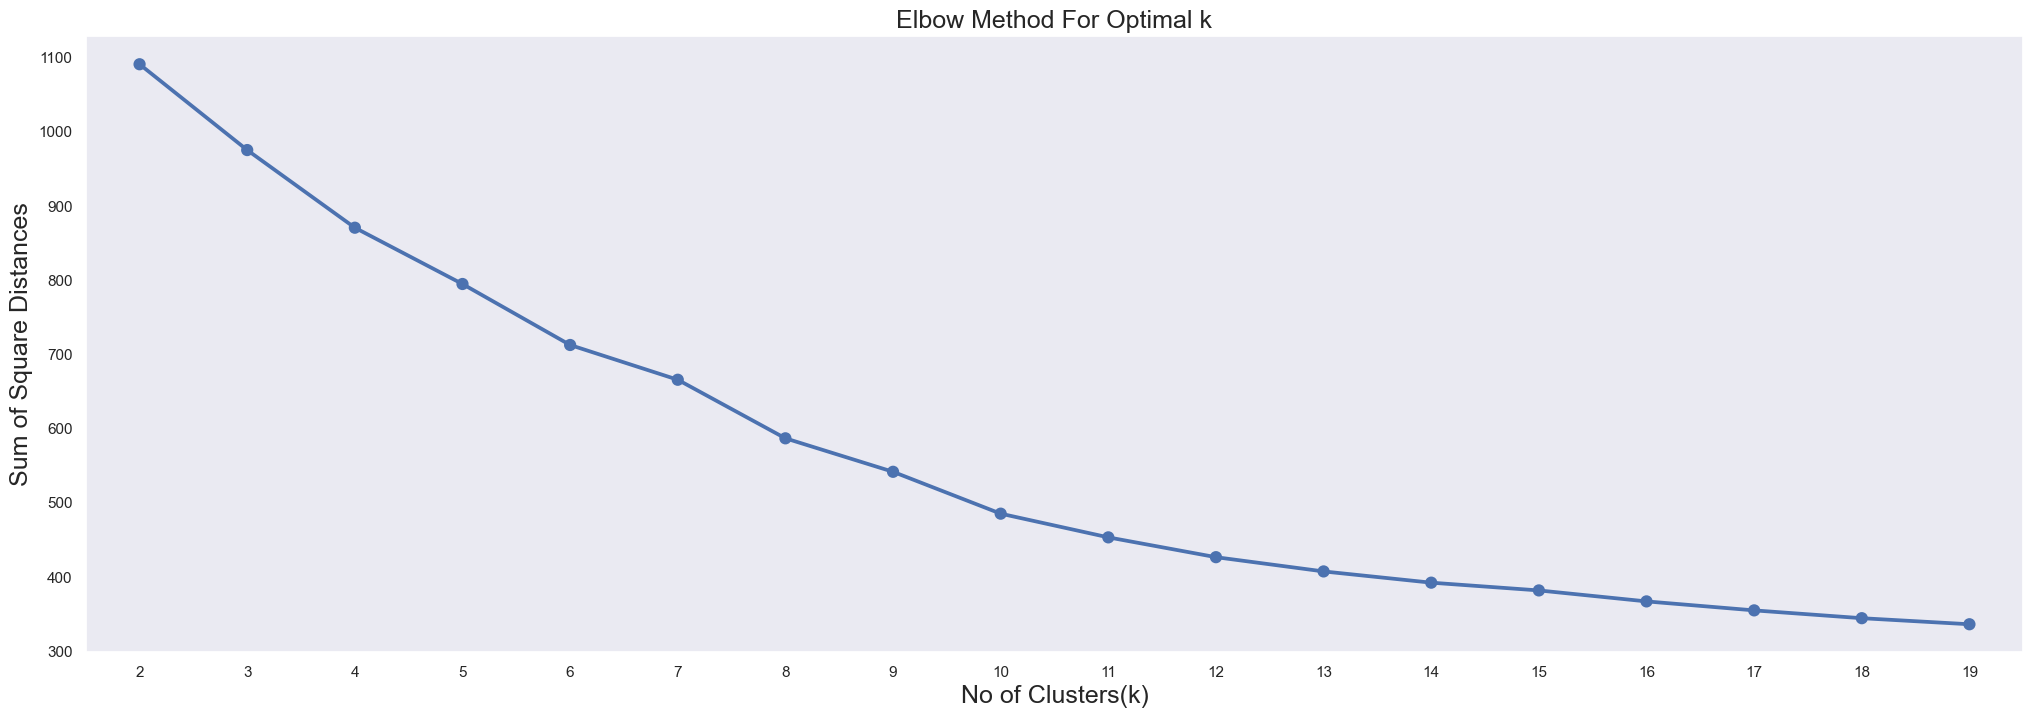

In [78]:
plt.figure(figsize=(25,8))
sns.pointplot(x = list(sum_sq_dist.keys()), y = list(sum_sq_dist.values()))
plt.xlabel('No of Clusters(k)',fontsize = 18)
plt.ylabel('Sum of Square Distances',fontsize = 18)
plt.title('Elbow Method For Optimal k',fontsize = 18)

plt.show()

#### Silhouette score  to find optimum k value

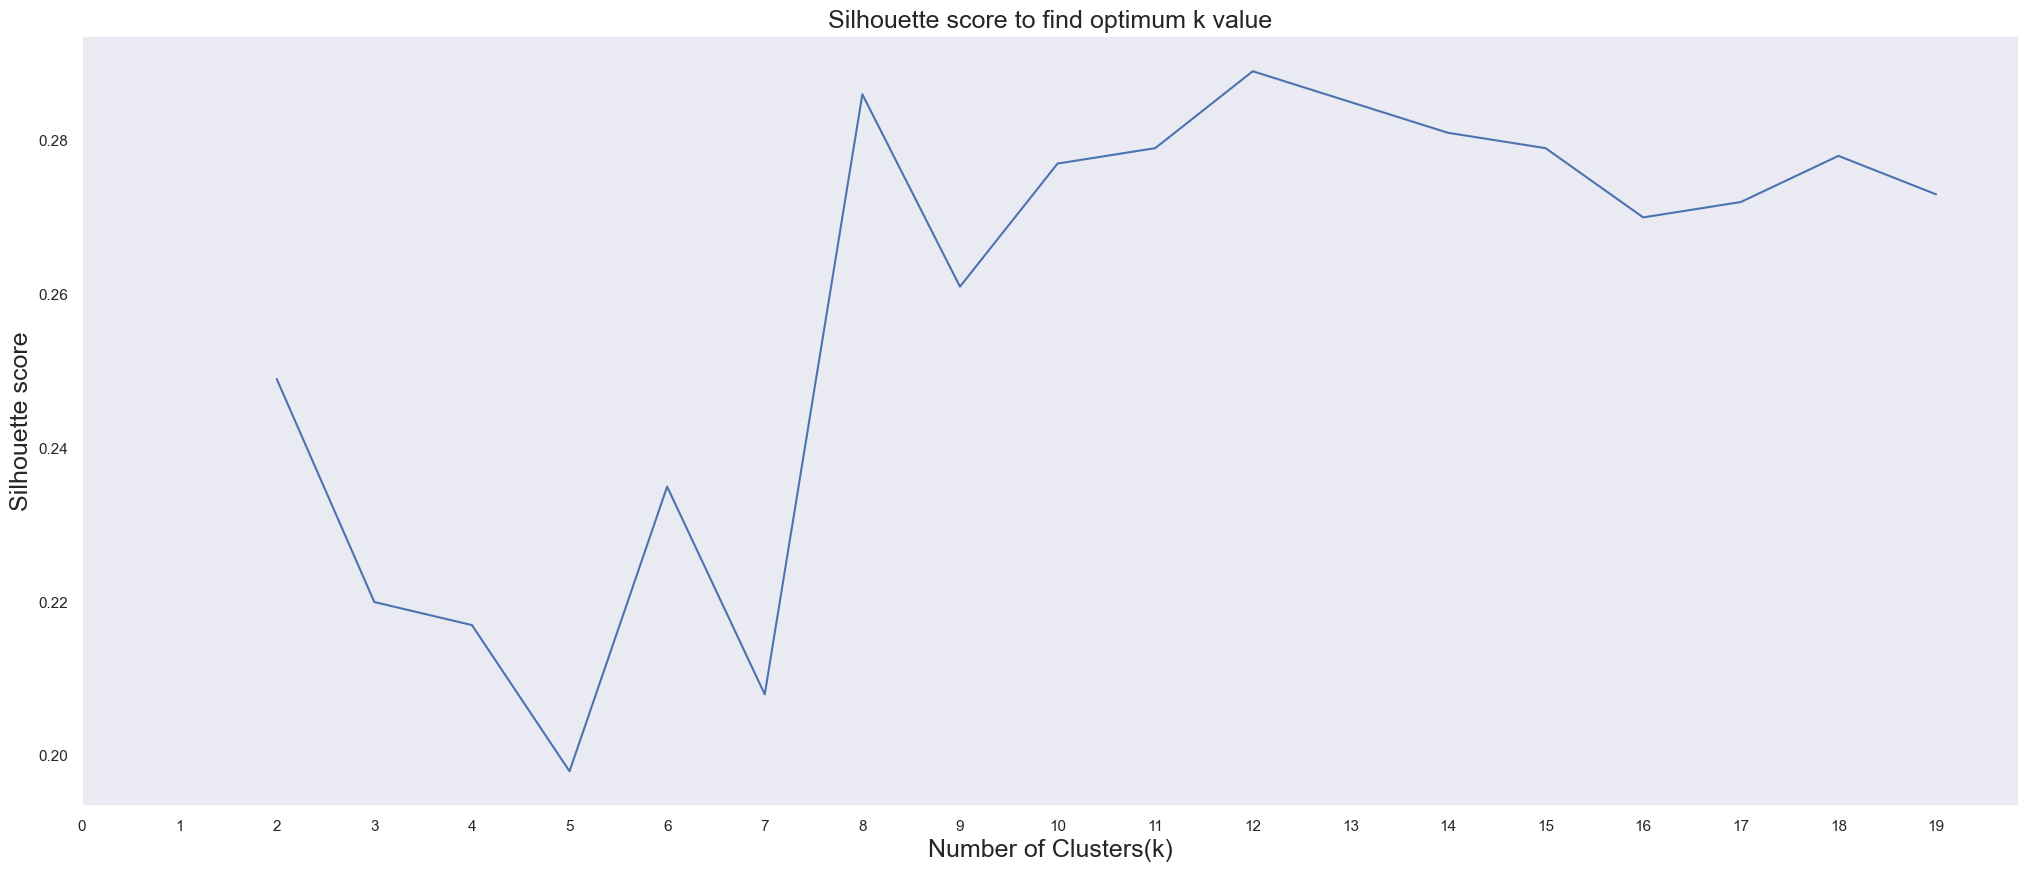

In [79]:
score_df = pd.DataFrame(silhouette_s_ , columns = ["No of Clusters" , "Silhouette Score"])
plt.figure(figsize=(25,10))
sns.lineplot(x = score_df['No of Clusters'], y = score_df['Silhouette Score'])
plt.xticks(ticks = np.arange(0,20,1))
plt.xlabel('Number of Clusters(k)',fontsize = 18)
plt.ylabel('Silhouette score',fontsize = 18)
plt.title('Silhouette score to find optimum k value',fontsize = 18)

plt.show()

*~ Optimum value found for cluster k = 12*

#### Performing K-means clustering for K=12

In [80]:
clust = KMeans(n_clusters=12)
clust.fit(scaled_X)

KMeans(n_clusters=12)

In [81]:
preds = clust.predict(scaled_X)
pred = preds.reshape(-1, 1)

In [82]:
df['labels'] = clust.labels_

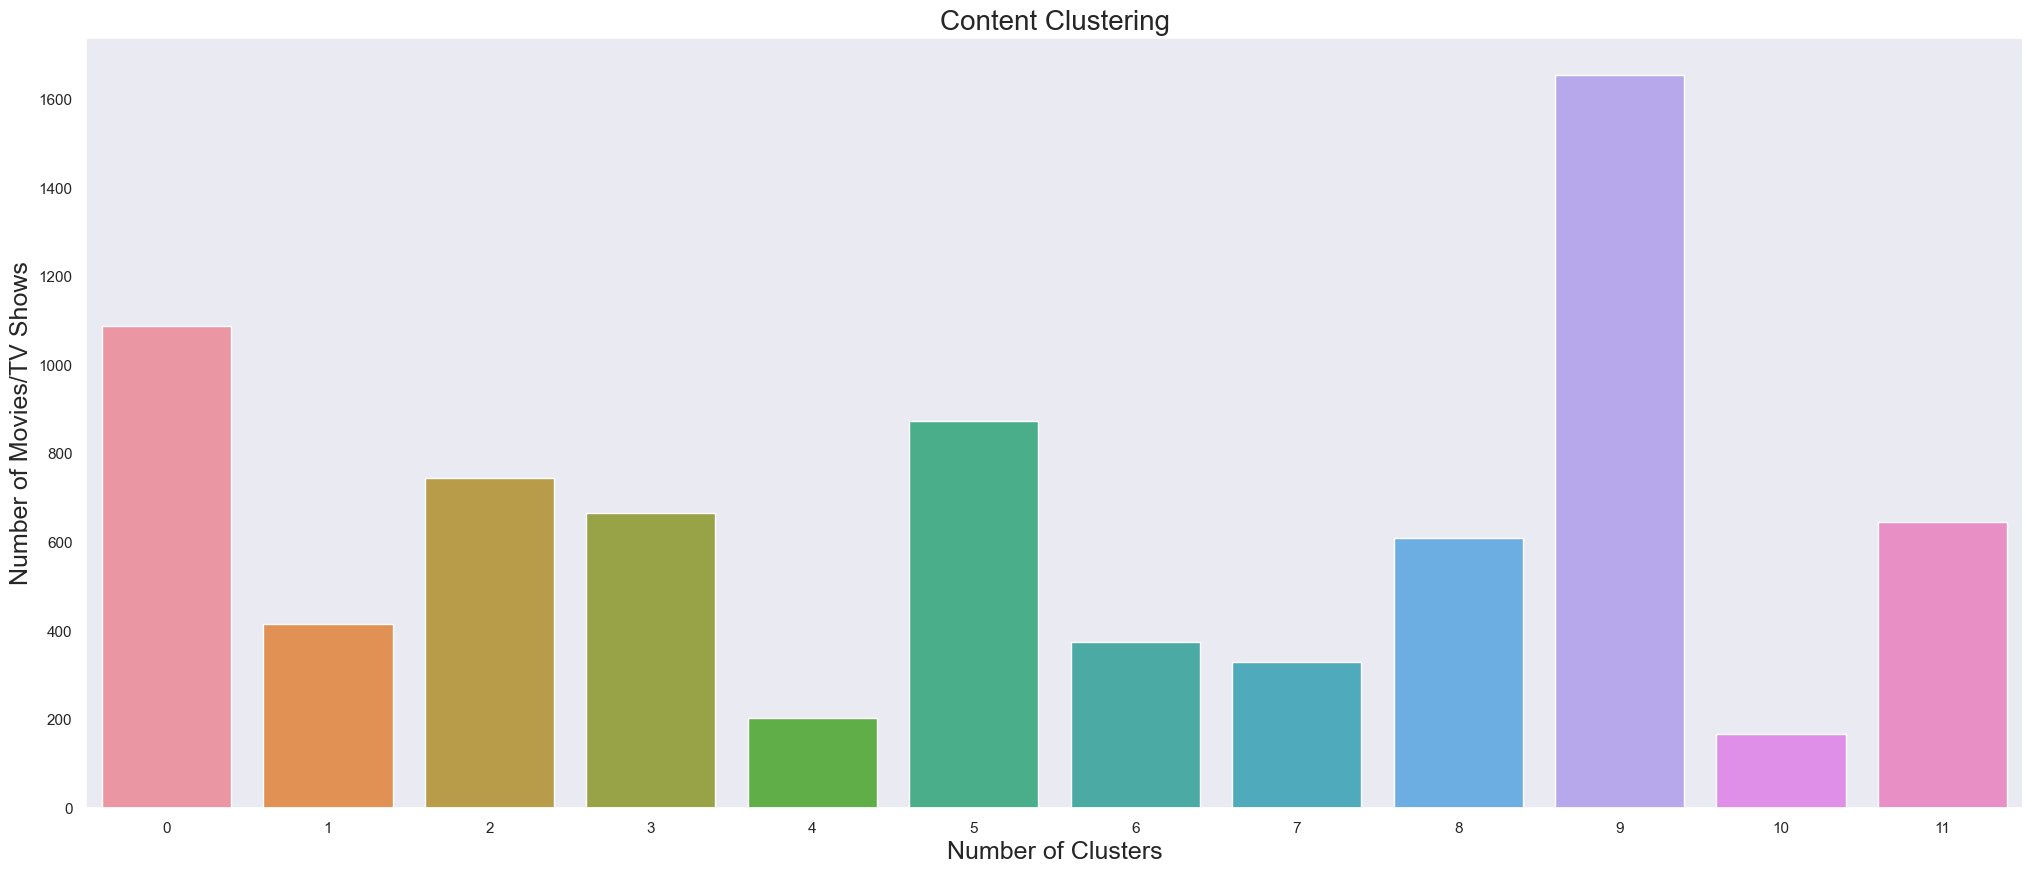

In [83]:
# chart to show no of content per cluster
plt.figure(figsize=(25,10))
sns.countplot(x='labels', data = df)
plt.title('Content Clustering',fontsize = 20)

plt.ylabel('Number of Movies/TV Shows',fontsize = 18)
plt.xlabel('Number of Clusters',fontsize = 18)
plt.show()

#### Silhouette Score visualizer

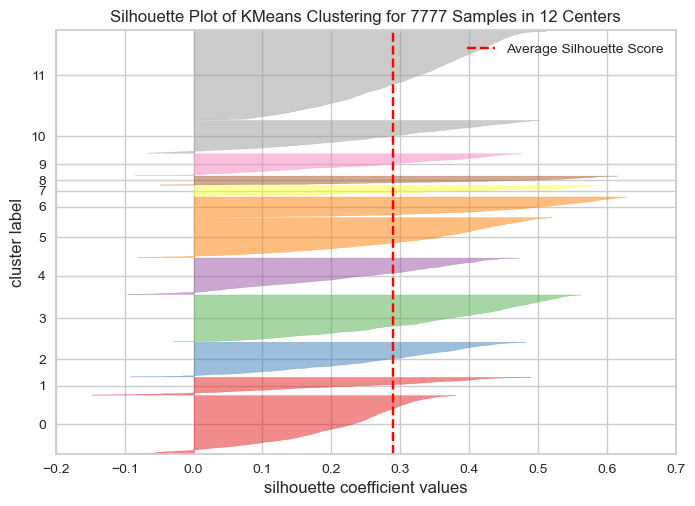

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7777 Samples in 12 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [84]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=12)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_X)
visualizer.show()

### Recommendation model

    - Content-based recommendation model using TF-IDF vectorization and cosine similarity for suggesting movies or TV shows based on their textual descriptions

In [85]:
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the description text
tfidf_matrix = tfidf_vectorizer.fit_transform(bag_of_words)

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [86]:
indices = pd.Series(cluster_df.index)

In [87]:
# Function to get recommendations based on title

def get_recommendations(title, cosine_sim=cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])
        
    return pd.DataFrame(recommended_movies, index=[i for i in range(1,len(recommended_movies)+1)] ,columns = ['Recommended movies'])

In [88]:
# Example: Get recommendations for a movie
recommendations = get_recommendations("ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS")
recommendations

,Recommended movies
1,Rush: Beyond the Lighted Stage
2,SHOT! The Psycho-Spiritual Mantra of Rock
3,Roots
4,ReMastered: Devil at the Crossroads
5,Once in a Lifetime Sessions with OneRepublic
6,The Show Must Go On: The Queen + Adam Lambert ...
7,Now More Than Ever: The History of Chicago
8,Nature's Great Events: Diaries
9,Chris Brown: Welcome to My Life
10,The Rolling Stones: Olé Olé Olé! A Trip Across...


In [89]:
# Example: Get recommendations for a movie
recommendations = get_recommendations("1994")
recommendations

,Recommended movies
1,Crime Diaries: The Candidate
2,"Nisman: The Prosecutor, the President, and the..."
3,Who Killed Malcolm X?
4,Conversations with a Killer: The Ted Bundy Tapes
5,The Alcàsser Murders
6,Narcos: Mexico
7,El Chapo
8,Maradona in Mexico
9,"Ayotzinapa, el paso de la tortuga"
10,Nuestra Lucha Libre


In [90]:
# Example: Get recommendations for a movie
recommendations = get_recommendations("3 Idiots")
recommendations

,Recommended movies
1,PK
2,Sanju
3,Rang De Basanti
4,Ek Main Aur Ekk Tu
5,War Chhod Na Yaar
6,No Entry
7,Andaz Apna Apna
8,College Romance
9,Don
10,Boom


### Model Evaluation and Selection points

### 1. Which Evaluation metrics did you consider for a positive business impact and why ?

The Silhouette Score was a crucial evaluation metric considered for its ability to measure the coherence within clusters and separation between them. This metric provides a quantitative assessment of the clustering quality, aiding objective comparisons among different clustering approaches. With a range from -1 to 1, closer scores to 1 signify better clustering solutions.

Utilizing the Silhouette Score offers insights into optimal cluster numbers, enabling informed decisions. It evaluates clustering cohesion and separation, essential for determining an effective number of clusters, which, in turn, enhances recommendations for Netflix users. Ultimately, this enhances customer satisfaction and engagement.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Considering the Silhouette Score's representation of sample classification within clusters, the kmeans model's Silhouette Score of 0.289 indicates notable separation and definition within clusters. This quality is pivotal for Netflix's Movies and TV Shows Clustering task, facilitating coherent and user-friendly groupings of similar content.

Hence, the kmeans model, boasting a Silhouette Score of 0.289, emerges as the final prediction model. Its balance between accuracy and interpretability, along with its simplicity and ease of implementation, makes it a fitting choice for this particular task.

### Conclusion:

The analysis of Netflix's content distribution over the years revealed intriguing trends and patterns, shedding light on the platform's evolving landscape:

**Content Evolution:**
  - Netflix initially favored movies, but recent years have witnessed a significant shift towards emphasizing TV shows.
  - The growth rate of movies on Netflix outpaces that of TV shows, although both have seen a notable increase post-2015. Notably, 2017 marked the pinnacle of movie releases.
  - Following 2017, movie releases dwindled, contrasting with a surge in TV show releases during the same period.

**Release Patterns:**
  - The temporal distribution of content reveals a concentration of releases towards year-end or the beginning of the year, indicating a strategic release approach by content creators.

**Content Genre and Origin:**
  - International Movies/TV Shows take the lead as the most prevalent genre on Netflix, closely followed by Drama and Comedy.
  - The United States emerges as the primary content-producing country, trailed by India, UK, Japan, and South Korea.

**Key Directors and Actors:**
  - Jan Sulter and Raul Campos stand out as prolific directors contributing significantly to Netflix's content library.
  - Indian actors notably dominate the top ranks among the actors with the most content, with Anupam Kher, Shah Rukh Khan, and Om Puri leading the pack.

**Content Ratings and Duration:**
  - The TV-MA rating tops the charts, signaling the popularity of mature content among Netflix viewers.
  - Movies predominantly fall within the 80 to 120-minute duration bracket, maintaining a standard length for viewer engagement.

**TV Show Statistics:**
  - Most TV shows exhibit a single-season format, with exceptions like Grey's Anatomy, standing as the longest-running show with an impressive 16 seasons.

**Cluster Analysis Insights:**
  - Employing k=12 as the optimal clustering value revealed 12 distinct clusters within the data, enabling a structured understanding of content categorization.

**Principal Component Analysis (PCA):**
  - PCA analysis demonstrates that approximately 95% of the variance is explained by 5000 components, offering valuable insights into the underlying variance distribution.

### Future Scope

- Investigate further into regional content preferences to enhance global offerings and engagement.

- Implement live data streaming to update content continuously, facilitating real-time analytics and user recommendations.

- Deploy the content-based recommender system on a cloud server (AWS, Azure, Google Cloud) for universal accessibility and scalable access worldwide.